In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("AAPL.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900
1,2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168793,63135500
2,2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469131,70170500
3,2022-08-11,170.059998,170.990005,168.190002,168.490005,167.722534,57149200
4,2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316101,68039400
...,...,...,...,...,...,...,...
245,2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
246,2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100
247,2023-08-02,195.039993,195.179993,191.850006,192.580002,192.580002,50389300
248,2023-08-03,191.570007,192.369995,190.690002,191.169998,191.169998,61235200


In [3]:
training_set = data.iloc[:,1:2].values
training_set

array([[166.369995],
       [164.020004],
       [167.679993],
       [170.059998],
       [169.820007],
       [171.520004],
       [172.779999],
       [172.770004],
       [173.75    ],
       [173.029999],
       [169.690002],
       [167.080002],
       [167.320007],
       [168.779999],
       [170.570007],
       [161.149994],
       [162.130005],
       [160.309998],
       [156.639999],
       [159.75    ],
       [156.470001],
       [154.820007],
       [154.639999],
       [155.470001],
       [159.589996],
       [159.899994],
       [154.789993],
       [154.649994],
       [151.210007],
       [149.309998],
       [153.399994],
       [157.339996],
       [152.380005],
       [151.190002],
       [149.660004],
       [152.740005],
       [147.639999],
       [146.100006],
       [141.279999],
       [138.210007],
       [145.029999],
       [144.070007],
       [145.809998],
       [142.539993],
       [140.419998],
       [139.899994],
       [139.130005],
       [134.9

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [5]:
x_train = training_set[0:249]
y_train = training_set[1:250]

In [7]:
x_train = np.reshape(x_train,(249,1,1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [22]:
regressor = Sequential()

In [23]:
regressor.add(LSTM(units=4,activation ='sigmoid',input_shape=(None,1)))

In [24]:
regressor.add(Dense(units=1))

In [25]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
regressor.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
8/8 [==============================] - 1s 2ms/step - loss: 0.1145
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1052
Epoch 3/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0969
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0785
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 9/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 11/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 12/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0628
Epoch 13/200
8/8 [==============================] - 0s 2ms/st

8/8 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 105/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0320
Epoch 106/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 107/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 108/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 109/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 110/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 111/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 112/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 113/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0292
Epoch 114/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0289
Epoch 115/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 116/200
8/8 [==============================] - 0

In [27]:
test_set = pd.read_csv("AAPL.csv")

In [28]:
real_stock_price = test_set.iloc[:,1:2]

In [29]:
inputs = real_stock_price
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs,(250,1,1))

In [30]:
predicted_stock_price = regressor.predict(inputs)

8/8 [==============================] - 0s 1ms/step


In [31]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

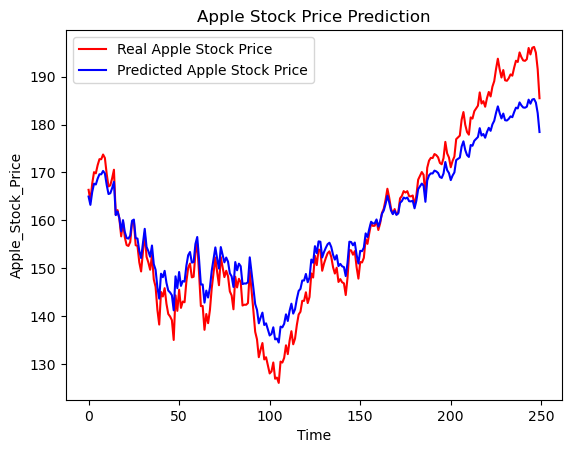

In [33]:
import matplotlib.pyplot as plt 
plt.plot(real_stock_price,color='red',label='Real Apple Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple_Stock_Price')
plt.legend()
plt.show()